In [211]:
# (1) 모듈 불러오기
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [212]:
# (2) 데이터 프레임으로 불러오기.
df=pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")
df.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

In [213]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


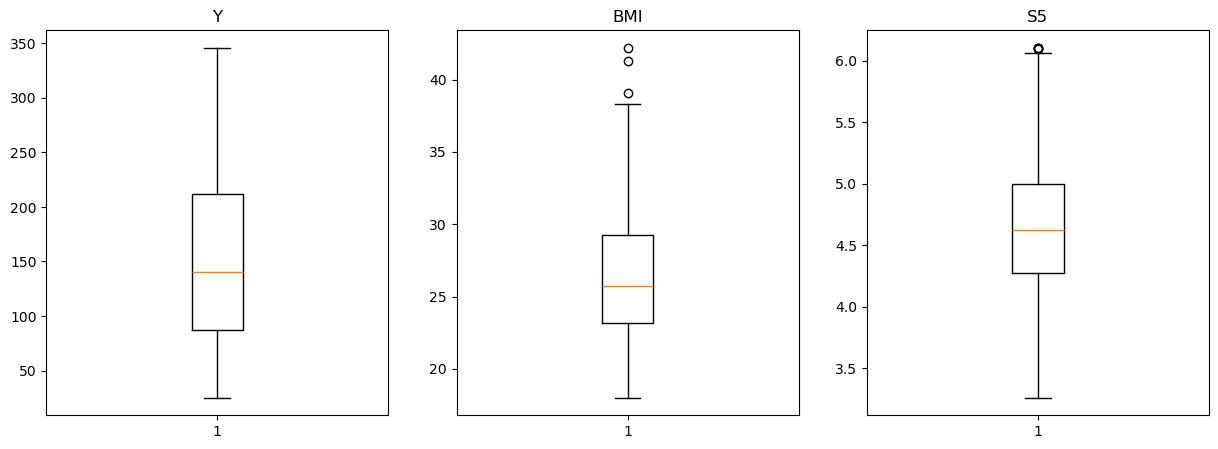

In [214]:
# 
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# 첫 번째 박스 플롯
ax[0].boxplot(df['Y'])
ax[0].set_title('Y')

# 두 번째 박스 플롯
ax[1].boxplot(df['BMI'])
ax[1].set_title('BMI')

# 세 번째 박스 플롯
ax[2].boxplot(df['S5'])
ax[2].set_title('S5')

# 그래프 출력
plt.show()

In [215]:
df_corr = df.corr()
abs(df_corr['Y']).sort_values(ascending=False).head(3)

Y      1.000000
BMI    0.586450
S5     0.565883
Name: Y, dtype: float64

<타겟> 
- Y 

<피처>
- BMI
- S5

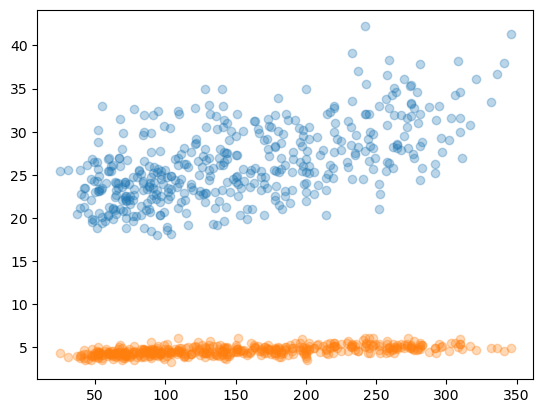

In [216]:
# 시각화 => 분
plt.scatter(df['Y'], df['BMI'], alpha=0.3)
plt.scatter(df['Y'], df['S5'], alpha=0.3)
plt.show()

- 값을 도출해보면 각 데이터의 스케일이 달라서 비교가 데이터 분포가 제각각이다.
- 따라서 정규화 필요.

In [217]:
#df = df.sample(frac=1.)

In [218]:
from sklearn.model_selection import train_test_split
# 피처 및 타겟 준비
featureDF = df[['BMI', 'S5']] #2차원 데이터
targetSR = df['Y'] # 1차원 데이터

# 훈련용 데이터군(80)와 테스트 데이터군(20) 준비.
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2, random_state=8) # 8 -> 54


In [219]:
# 각각의 데이터의 형태 확인.
print(f"X_train : {X_train.shape}")
print(X_train.head(2))
print()
print(f"y_train : {y_train.shape}")
print(y_train.head(2))
print()
print(f"X_test : {X_test.shape}")
print(X_test.head(2))
print()
print(f"y_test : {y_test.shape}")
print(y_test.head(2))

X_train : (353, 2)
      BMI      S5
416  33.8  4.3175
141  30.8  5.1358

y_train : (353,)
416    257
141    317
Name: Y, dtype: int64

X_test : (89, 2)
      BMI      S5
367  42.2  5.0106
219  22.5  4.6540

y_test : (89,)
367    242
219    185
Name: Y, dtype: int64


In [220]:
# 데이터 전처리 - 표준 정규분포 스케일링
scaler = StandardScaler()
scaler

StandardScaler()

In [221]:
# 학습
scaler.fit(X_train)

StandardScaler()

In [222]:
# 스케일링
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [223]:
from sklearn.neighbors import KNeighborsRegressor

# 모델 인스턴스 생성
model = KNeighborsRegressor()

In [224]:
# 데이터 학습 및 테스트 데이터에 대한 점수 확인
train_scoreList = []
test_scoreList = []

for k in range(1, 353+1) :
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(scaled_X_train, y_train)
    model.score(scaled_X_test, y_test)
    train_scoreList.append(model.score(scaled_X_train, y_train))
    test_scoreList.append(model.score(scaled_X_test, y_test))

print('train_scoreList : ', train_scoreList)
print()
print('test_scoreList : ', test_scoreList)

train_scoreList :  [0.9881297064705523, 0.7509069885698983, 0.66670748885634, 0.6038354393685958, 0.5897467562076304, 0.5487945259757273, 0.5295824466756324, 0.5330529501000333, 0.5274665637234099, 0.5117410146959991, 0.5041916092208367, 0.4980888377727708, 0.4883186637758802, 0.491254953006237, 0.4878854922177972, 0.4826556399137183, 0.48428917651998227, 0.4814534158712601, 0.4798706071732395, 0.4778777439753056, 0.4757044324561043, 0.4682514542885331, 0.47056314472966987, 0.4698760345593548, 0.46908464895939384, 0.4679553707140439, 0.4677103376969094, 0.4673054651158658, 0.465921282887928, 0.46565100815424787, 0.46339753423868113, 0.46270564324814545, 0.46137755496231314, 0.4614616676135733, 0.45954763208089444, 0.45703813582321695, 0.4557275509951886, 0.4534484747278834, 0.4538092010588469, 0.4517646952924421, 0.4518551383855324, 0.4484468414755124, 0.4477036540393615, 0.4494666137004093, 0.4464186986520766, 0.4449119683509206, 0.4425479496187198, 0.4414921647466479, 0.4389936881160

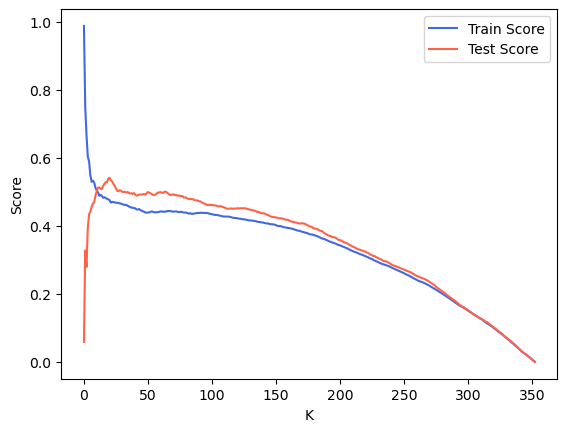

In [225]:
plt.plot(train_scoreList, 'royalblue', label = 'Train Score')
plt.plot(test_scoreList, 'tomato', label = 'Test Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.legend()
plt.show()

In [226]:
k=test_scoreList.index(max(test_scoreList)) #테스트 값이 가장 클 때의 인덱스 = max_k
k

20

In [227]:
model2 = KNeighborsRegressor(n_neighbors=k+1)
model2.fit(scaled_X_train, y_train) 

KNeighborsRegressor(n_neighbors=21)

In [228]:
model2.score(scaled_X_train, y_train)

0.4757044324561043

In [229]:
model2.score(scaled_X_test, y_test)

0.5414706396421018

In [230]:
# 성능 평가

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # 모델의 성능을 평가할 떄 사용함
import numpy as np

y_pre = model2.predict(scaled_X_test) # 예측값 계산

y_pre = np.round(y_pre, 1)

print('[성능평가]')
print()

# 1) MSE
print('1) 평균제곱오차:', mean_squared_error(y_test, y_pre))

# 2) MAE
print('2) 평균절대오차:', mean_absolute_error(y_test, y_pre))

# 3) R2
r2_scores = r2_score(y_test, y_pre)
print('3) 루트제곱오차:', r2_scores)

# 4) RMSE
rmse = mean_squared_error(y_test, y_pre, squared=False)
print('4) 평균제곱근오차:', rmse)


[성능평가]

1) 평균제곱오차: 2680.29191011236
2) 평균절대오차: 42.970786516853934
3) 루트제곱오차: 0.5414200767818065
4) 평균제곱근오차: 51.77153571328901
